<a href="https://colab.research.google.com/github/harrislam1/covid19_NYC_taxi_trips/blob/EDA_Notebook/loading_NYC_taxi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime as dt

#Loading Yellow Cab Data for the year 2020

Since the data is stored separately for each month, 
we load them through a loop and save the entire year's
data as a dictionary of dataframes.

In [2]:
yellow_2020url="https://nyc-tlc.s3.amazonaws.com/trip+data/yellow_tripdata_2020-" #yellow taxi data for 2020
#green_2020url="https://nyc-tlc.s3.amazonaws.com/trip+data/green_tripdata_2020-" #green taxi data for 2020
#fhv_2020url="https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2020-" #for hire vehicle data for 2020(Uber/Lyft)
months=["01","02","03","04","05","06","07","08","09","10","11","12"]
end=".csv"
df_yellow2020={}
#df_green2020={}
#df_fhv2020={}

for elem in range(len(months)):
  df_yellow2020[elem]=pd.read_csv(yellow_2020url+months[elem]+end)
  df_yellow2020[elem]['pick_up_date']=pd.to_datetime(df_yellow2020[elem].tpep_pickup_datetime)
  df_yellow2020[elem]['year']=df_yellow2020[elem].pick_up_date.dt.year
  df_yellow2020[elem]['month']=df_yellow2020[elem].pick_up_date.dt.month
  
  #df_green2020[elem]=pd.read_csv(green_2020url+months[elem]+end)
  #df_fhv2020[elem]=pd.read_csv(fhv_2020url+months[elem]+end)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_yellow2020[0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pick_up_date,year,month
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,2020-01-01 00:28:15,2020,1
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,2020-01-01 00:35:39,2020,1
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,2020-01-01 00:47:41,2020,1
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,2020-01-01 00:55:23,2020,1
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2020-01-01 00:01:58,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,2020-01-31 22:51:00,2020,1
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,2020-01-31 22:10:00,2020,1
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,2020-01-31 22:50:07,2020,1
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,2020-01-31 22:25:53,2020,1


#Extracting correct dates 

Each month happens to have some bad dates,
so we loop through the entire dictionary to extract only the proper dates for each month.

In [4]:
yellow2020_clean={}
for i in range(len(df_yellow2020)):
  yellow2020_clean[i]=df_yellow2020[i].loc[(df_yellow2020[i].month==i+1) & (df_yellow2020[i].year==2020)]

In [5]:
#check cleaned dictionary 
df_yellow2020[10].loc[(df_yellow2020[10].month==11) & (df_yellow2020[10].year==2020)].shape

(1508873, 21)

In [6]:
yellow2020_clean[10].shape

(1508873, 21)

In [20]:
df_yellow2020[0].shape

(6405008, 21)

In [21]:
yellow2020_clean[0].shape

(6404796, 21)

In [23]:
#bad date entries for January
df_yellow2020[0].shape[0]-yellow2020_clean[0].shape[0]

212

#Preliminary Plots

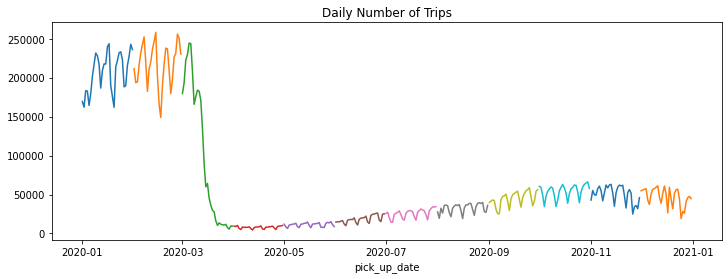

In [14]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['trip_distance'].count().plot(title='Daily Number of Trips', figsize=(12,4))

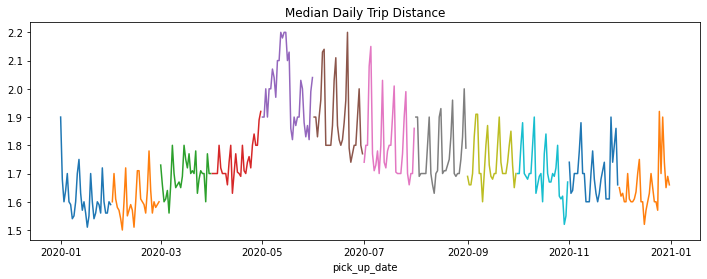

In [12]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['trip_distance'].median().plot(title='Median Daily Trip Distance', figsize=(12,4))

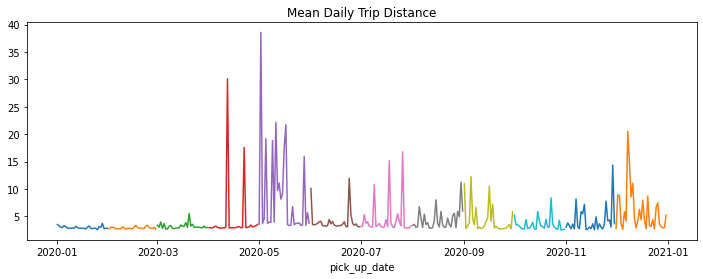

In [13]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['trip_distance'].mean().plot(title='Mean Daily Trip Distance', figsize=(12,4))

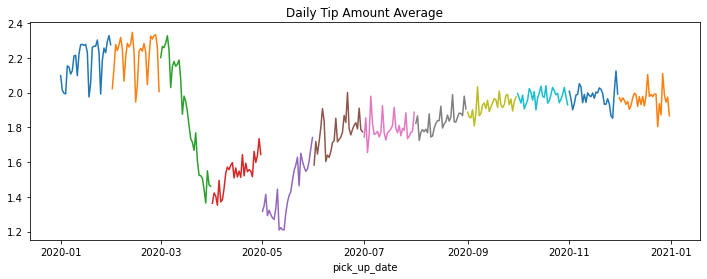

In [15]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['tip_amount'].mean().plot(figsize=(12,4), title='Daily Tip Amount Average')

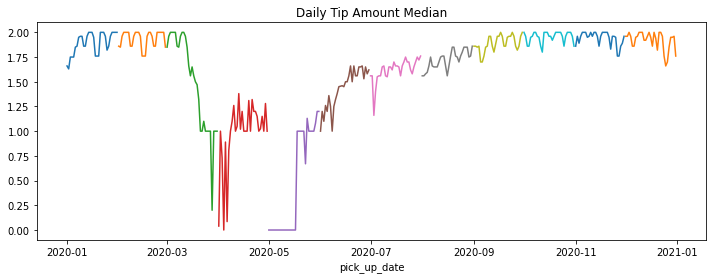

In [16]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['tip_amount'].median().plot(figsize=(12,4), title='Daily Tip Amount Median')

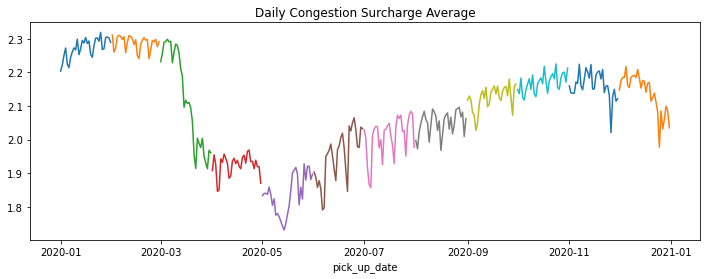

In [17]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['congestion_surcharge'].mean().plot(figsize=(12,4), title='Daily Congestion Surcharge Average')

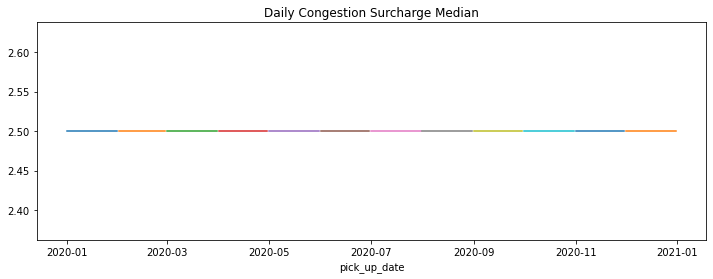

In [19]:
for i in range(len(yellow2020_clean)):
  yellow2020_clean[i].groupby(yellow2020_clean[i].pick_up_date.dt.date)['congestion_surcharge'].median().plot(figsize=(12,4),title='Daily Congestion Surcharge Median')